<a href="https://colab.research.google.com/github/EisaacJC/Deep-Learning-4-CV/blob/main/dl4cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision notes

In [107]:
import numpy as np
import matplotlib.pyplot as plt

## Un breve repaso del descenso por el gradiente.

Consideremos una función escalar, es decir, una función que satisfaga un mapeo de la forma $f:\mathbb{R}^n\to\mathbb{R}$, y consideremos un punto $\vec{p}=(x_1,x_2,\cdots,x_n)$, en este caso el gradiente de la función estaría dado por:
$$\vec{\nabla}f(x_1,x_2,\cdots,x_n)=\frac{\partial }{\partial x_i}f(x_1,x_2,\cdots,x_n) \hat{e}_i$$



Recordemos que por las condiciones discutidas previamente buscamos el valor de $\vec{p}$ tal que el gradiente evaluado en ese punto sea cero, es decir:

$$\vec{\nabla}f(\vec{p})=0$$

En este caso $\vec{p}$ será un punto inicial, sin embargo, no se espera que el primer punto satisfaga esta condición, es por esto que en general trataremos de encontrar un punto siguiente tal que en ese caso el gradiente satisfaga la condición.

Podemos llevar a cabo el etiquetado de los puntos de la forma $\vec{p}_n$, lo que queremos es que justamente el gradiente evaluado en ese valor sea cero, o al menos cercano a cero:
$$\vec{\nabla}f(\vec{p}_n)\approx 0$$

¿Qué condiciones se deben de dar para que esto se satisfaga?

Dado que es un proceso iterativo es natural proponer una métrica de error de la forma:

$$\vec{p}_{n+1}-\vec{p}_n$$

En el caso 1-dimensional:

$$\varepsilon=p_{n+1}-p_n$$


En este caso ya hemos definido nuestra primera condición, la cual consiste en que la distancia entre los dos puntos sea pequeña, pero, ¿qué tan pequeña? quisieramos que fuera cercana a cero, no obstante, notemos algo muy importante, otra de nuestras propuestas es que justamente nuestro gradiente de la función evaluada en el punto sea cercana a cero, de esta manera podemos proponer:

\begin{eqnarray}
& \varepsilon &  \alpha & (\pm) \nabla f(p_n)
\end{eqnarray}
En donde $\alpha$ representa una relación de proporcionalidad y el signo $(\pm)$ caracteriza al problema (-) para el problema de minimización (+) para el problema de maximización.

Para caracterizar propiamente el descenso por el gradiente debemos entonces ajustar esa proporcionalidad y hacerla una igualdad, esto mediante la introducción de una constante, misma que tendrá un nombre especial y servirá como hiperparámetro $\gamma$, a este hiperparámetro se le conoce como tasa de aprendizaje.

Así podemos escribir:
$$p_{n+1}=p_n-\gamma \nabla f(p_n)$$

### Implementación naive del descenso por el gradiente:

In [108]:
#Implementación numérica del gradiente
import numpy as np
#Función a evaluar, es importante notar que la función está vectorizada.
def f(X):
    X = np.atleast_2d(X)
    return X[:, 0]**2 - X[:, 1]**2

def numerical_gradient(f, X, h=1e-8):
    X = np.atleast_2d(X)
    grad = np.zeros_like(X)
    for i in range(X.shape[1]):
        X_plus = X.copy()
        X_minus = X.copy()
        X_plus[:, i] += h
        X_minus[:, i] -= h
        grad[:, i] = (f(X_plus) - f(X_minus)) / (2 * h)
    return grad.squeeze()

In [109]:
def SGD(theta, lr, maxiter):
    """
    El descenso por el gradiente estocástico tendrá dos condiciones de "parada"
    1. Llegamos al valor adecuado (el error es cero, es decir p_{n+1}=p_n)
    2. Llegamos al máximo de iteraciones (esto es útil porque hay casos en donde
    el algoritmo no llegará a la solución óptima nunca o en todo caso tardará más
    de lo que tenemos previsto)
    """
    path = np.zeros((maxiter + 1, 2))
    path[0] = theta
    for i in range(1, maxiter + 1):
        grad = numerical_gradient(f, path[i-1:i])
        path[i] = path[i-1] - lr * grad
    return path

## ¿Qué pasa con el descenso por el gradiente?
Como hemos discutido este algoritmo tiene limitantes importantes, en particular la búsqueda de un óptimo está determinada por un hiperparámetro, con esto en consideración configurar el modelo es algo que puede tornarse complicado:



1.   Valores más pequeños del learning rate (γ) tienden a dar mejores resultados en el proceso de optimización, sin embargo, esta elección hace que las ejecuciones sean más lentas y tiende a estancarse en mínimos locales.
2.   Valores más grandes del learning rate (γ) tienden a dar resultados menos precisos pero en ocasiones puede hacer que se estudie una región mayor del espacio, esto es particularmente útil para salir de mínimos locales.

![image.png](attachment:bf76124f-201c-42ee-9339-8f68dd9cc2e3.png)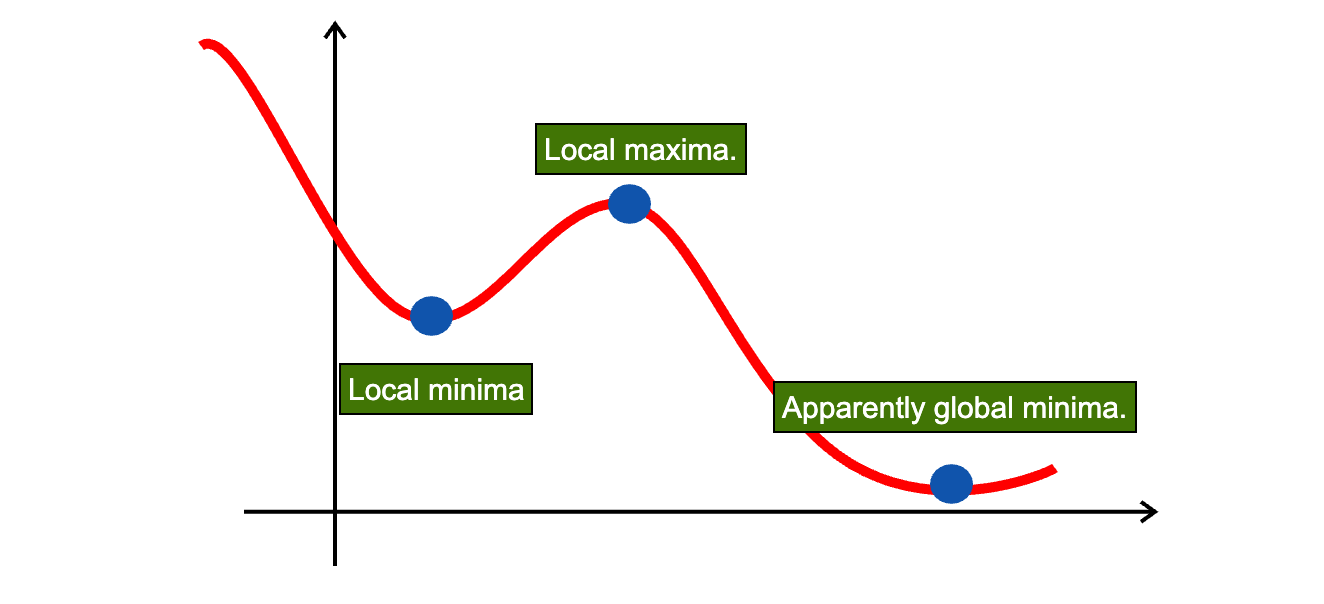

## Descenso por el gradiente con batch

Esta es una alternativa directa al descenso por el gradiente, la modificación sobre el algoritmo original es simple, en este caso se busca que en cada iteración se lleve un muestreo aleatorio de los datos y en base a estos lleva a cabo el cálculo del siguiente punto de la iteración.

### Ventajas del descenso con batch.


1.   Puede implementarse con cómputo en paralelo.
2.   En términos de la optimización permite explorar más el espacio de búsqueda, sobre todo, permite salir con más facilidad de los mínimos locales, sin embargo, esta sigue siendo una de sus áreas de oportunidad.


In [110]:
def SGD_batch(theta, lr, num_iters, batch_size):
    """
    La única variación respecto del anterior
    """
    path = np.zeros((num_iters + 1, 2))
    path[0] = theta
    for i in range(1, num_iters + 1):
        grad = numerical_gradient(f, path[i-1:i])
        path[i] = path[i-1] - lr * grad
    return path

## Descenso por el gradiente con momento (Gradient Descent with Momentum)

- Incorpora un término de momento al actualizar los parámetros.
- Actualización de los parámetros:
  - $ v_t = \beta v_{t-1} + (1 - \beta) \nabla J(\theta_t) $
  - $ \theta_{t+1} = \theta_t - \alpha v_t $
- $\beta$: factor de momento.
- $\gamma$: tasa de aprendizaje.

En resumen, el descenso por el gradiente con momento agrega un término de "momento" que acumula las direcciones anteriores del gradiente, acelerando la convergencia hacia el mínimo global y reduciendo oscilaciones.


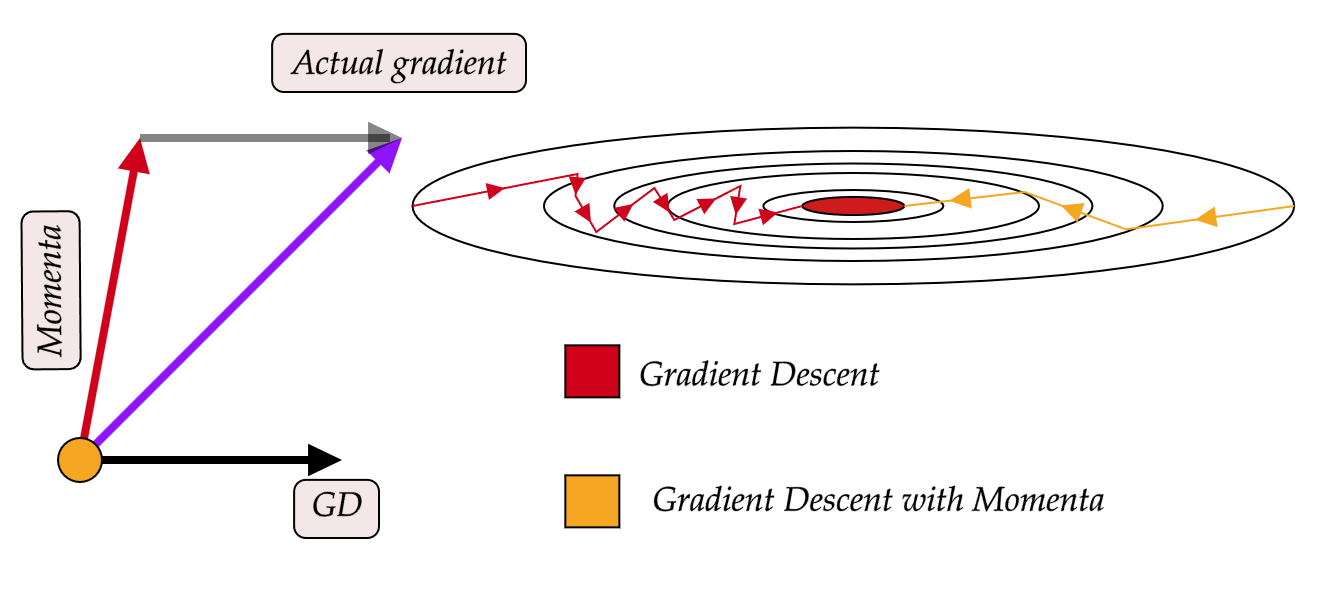

In [111]:
def gradient_descent_with_momentum(theta, lr, beta, num_iters):
    path = np.zeros((num_iters + 1, 2))
    path[0] = theta
    velocity = np.zeros_like(theta)
    for i in range(1, num_iters + 1):
        grad = numerical_gradient(f, path[i-1:i])
        velocity = beta * velocity + grad
        path[i] = path[i-1] - lr * velocity
    return path

## RMSprop (Root Mean Square Propagation):

- Adaptively ajusta la tasa de aprendizaje para cada parámetro.
- Actualización de los parámetros:
  - $ v_t = \beta v_{t-1} + (1 - \beta) (\nabla J(\theta_t))^2 $
  - $ \theta_{t+1} = \theta_t - \alpha \frac{\nabla J(\theta_t)}{\sqrt{v_t} + \epsilon} $
- $\beta$: factor de decaimiento.
- $\alpha$: tasa de aprendizaje.
- $\epsilon$: pequeño valor para evitar división por cero.

In [112]:
def rmsprop(theta, lr, beta, epsilon, num_iters):
    path = np.zeros((num_iters + 1, 2))
    path[0] = theta
    v = np.zeros_like(theta)
    for i in range(1, num_iters + 1):
        grad = numerical_gradient(f, path[i-1:i])
        v = beta * v + (1 - beta) * np.square(grad)
        path[i] = path[i-1] - lr * grad / (np.sqrt(v) + epsilon)
    return path

## Adam (Adaptive Moment Estimation):

- Combina los conceptos de momento y RMSProp.
- Actualización de los parámetros:
  - $ m_t = \beta_1 m_{t-1} + (1 - \beta_1) \nabla J(\theta_t) $
  - $ v_t = \beta_2 v_{t-1} + (1 - \beta_2) (\nabla J(\theta_t))^2 $
  - $ \hat{m}_t = \frac{m_t}{1 - \beta_1^t} $
  - $ \hat{v}_t = \frac{v_t}{1 - \beta_2^t} $
  - $ \theta_{t+1} = \theta_t - \alpha \frac{\hat{m}_t}{\sqrt{\hat{v}_t} + \epsilon} $
- $\beta_1$: factor de decaimiento para el momento.
- $\beta_2$: factor de decaimiento para la magnitud del gradiente.
- $\alpha$: tasa de aprendizaje.
- $\epsilon$: pequeño valor para evitar división por cero.

In [113]:
def adam(theta, lr, beta1, beta2, epsilon, num_iters):
    path = np.zeros((num_iters + 1, 2))
    path[0] = theta
    m = np.zeros_like(theta)
    v = np.zeros_like(theta)
    for t in range(1, num_iters + 1):
        grad = numerical_gradient(f, path[t-1:t])
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * np.square(grad)
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)
        path[t] = path[t-1] - lr * m_hat / (np.sqrt(v_hat) + epsilon)
    return path

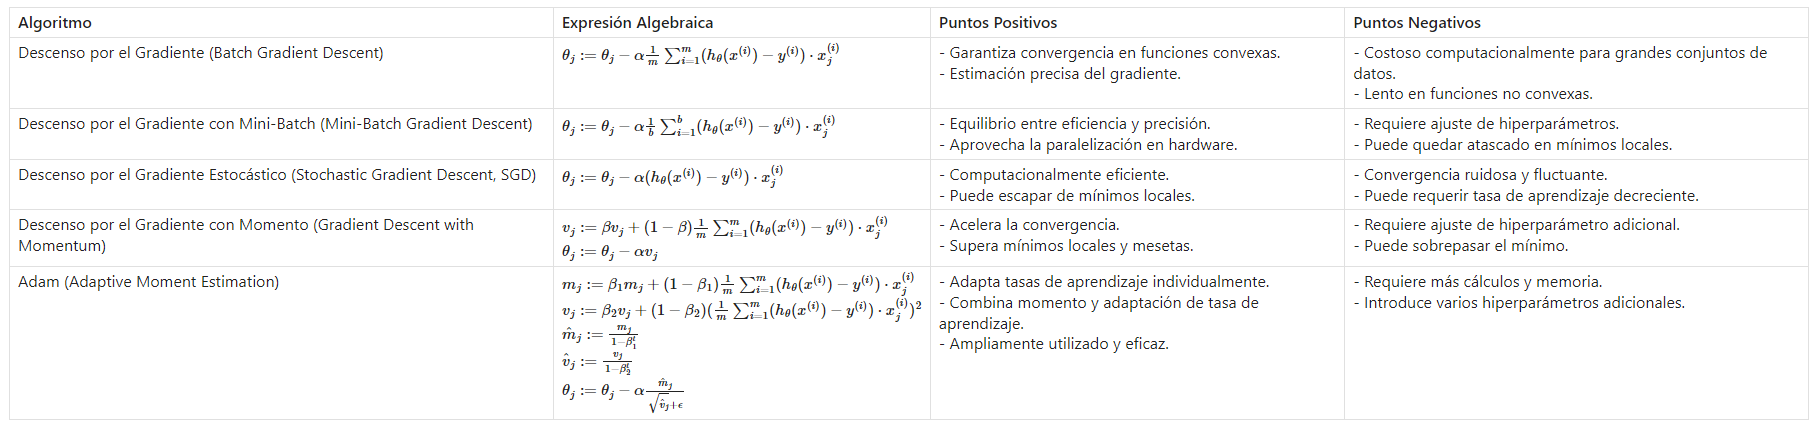

El algoritmo BFGS es un método de optimización numérica utilizado para resolver problemas de minimización no lineales sin restricciones. Su objetivo es encontrar el mínimo de una función f(x), donde x es un vector en Rⁿ. A diferencia del método de Newton, que requiere calcular la matriz Hessiana (la matriz de segundas derivadas parciales) en cada iteración, BFGS construye una aproximación de la inversa de la Hessiana utilizando solo información del gradiente.
El algoritmo comienza con un punto inicial x₀ y una aproximación inicial de la inversa de la Hessiana, H₀ (generalmente la matriz identidad). En cada iteración k, BFGS calcula la dirección de búsqueda pₖ resolviendo la ecuación Hₖ∇f(xₖ) = -pₖ, donde ∇f(xₖ) es el gradiente de f en xₖ. Luego, realiza una búsqueda lineal en la dirección pₖ para encontrar un nuevo punto xₖ₊₁ = xₖ + αₖpₖ, donde αₖ es el tamaño del paso que satisface las condiciones de Wolfe.
Después de actualizar xₖ₊₁, BFGS actualiza la aproximación de la inversa de la Hessiana utilizando la fórmula:
Hₖ₊₁ = (I - ρₖyₖsₖᵀ)Hₖ(I - ρₖsₖyₖᵀ) + ρₖsₖsₖᵀ
Donde sₖ = xₖ₊₁ - xₖ, yₖ = ∇f(xₖ₊₁) - ∇f(xₖ), ρₖ = 1 / (yₖᵀsₖ), e I es la matriz identidad. Esta actualización asegura que Hₖ₊₁ siga siendo simétrica y definida positiva, manteniendo buenas propiedades de convergencia. El algoritmo continúa iterando hasta que se alcanza un criterio de convergencia, como cuando la norma del gradiente es suficientemente pequeña.

In [114]:
def line_search(f, x, p, g, alpha=1.0, c1=1e-4, c2=0.9, max_iter=25):
    def phi(alpha):
        return f(x + alpha * p)

    phi_0 = f(x)
    dphi_0 = np.dot(g, p)

    for _ in range(max_iter):
        phi_alpha = phi(alpha)
        if phi_alpha <= phi_0 + c1 * alpha * dphi_0:
            return alpha
        alpha *= 0.5

    return alpha
def lbfgs(theta, num_iters, m=20, epsilon=1e-8, noise_scale=1e-5):
    path = [theta.copy()]
    x = theta.copy()
    n = len(x)
    H = np.eye(n)
    s = []
    y = []

    for k in range(num_iters):
        x_noisy = x + np.random.normal(0, noise_scale, x.shape)
        g = numerical_gradient(f, x_noisy.reshape(1, -1)).flatten()

        if k > 0:
            ys = np.dot(y[-1], s[-1])
            Hy = H.dot(y[-1])
            yHy = np.dot(y[-1], Hy)
            H = H + np.outer(s[-1], y[-1]) / (ys + epsilon) - \
                np.outer(Hy, Hy) / (yHy + epsilon)

        p = -H.dot(g)
        alpha = line_search(f, x, p, g)
        x_new = x + alpha * p

        s.append(x_new - x)
        y.append(numerical_gradient(f, x_new.reshape(1, -1)).flatten() - g)

        if len(s) > m:
            s.pop(0)
            y.pop(0)

        x = x_new
        path.append(x.copy())

    return np.array(path)

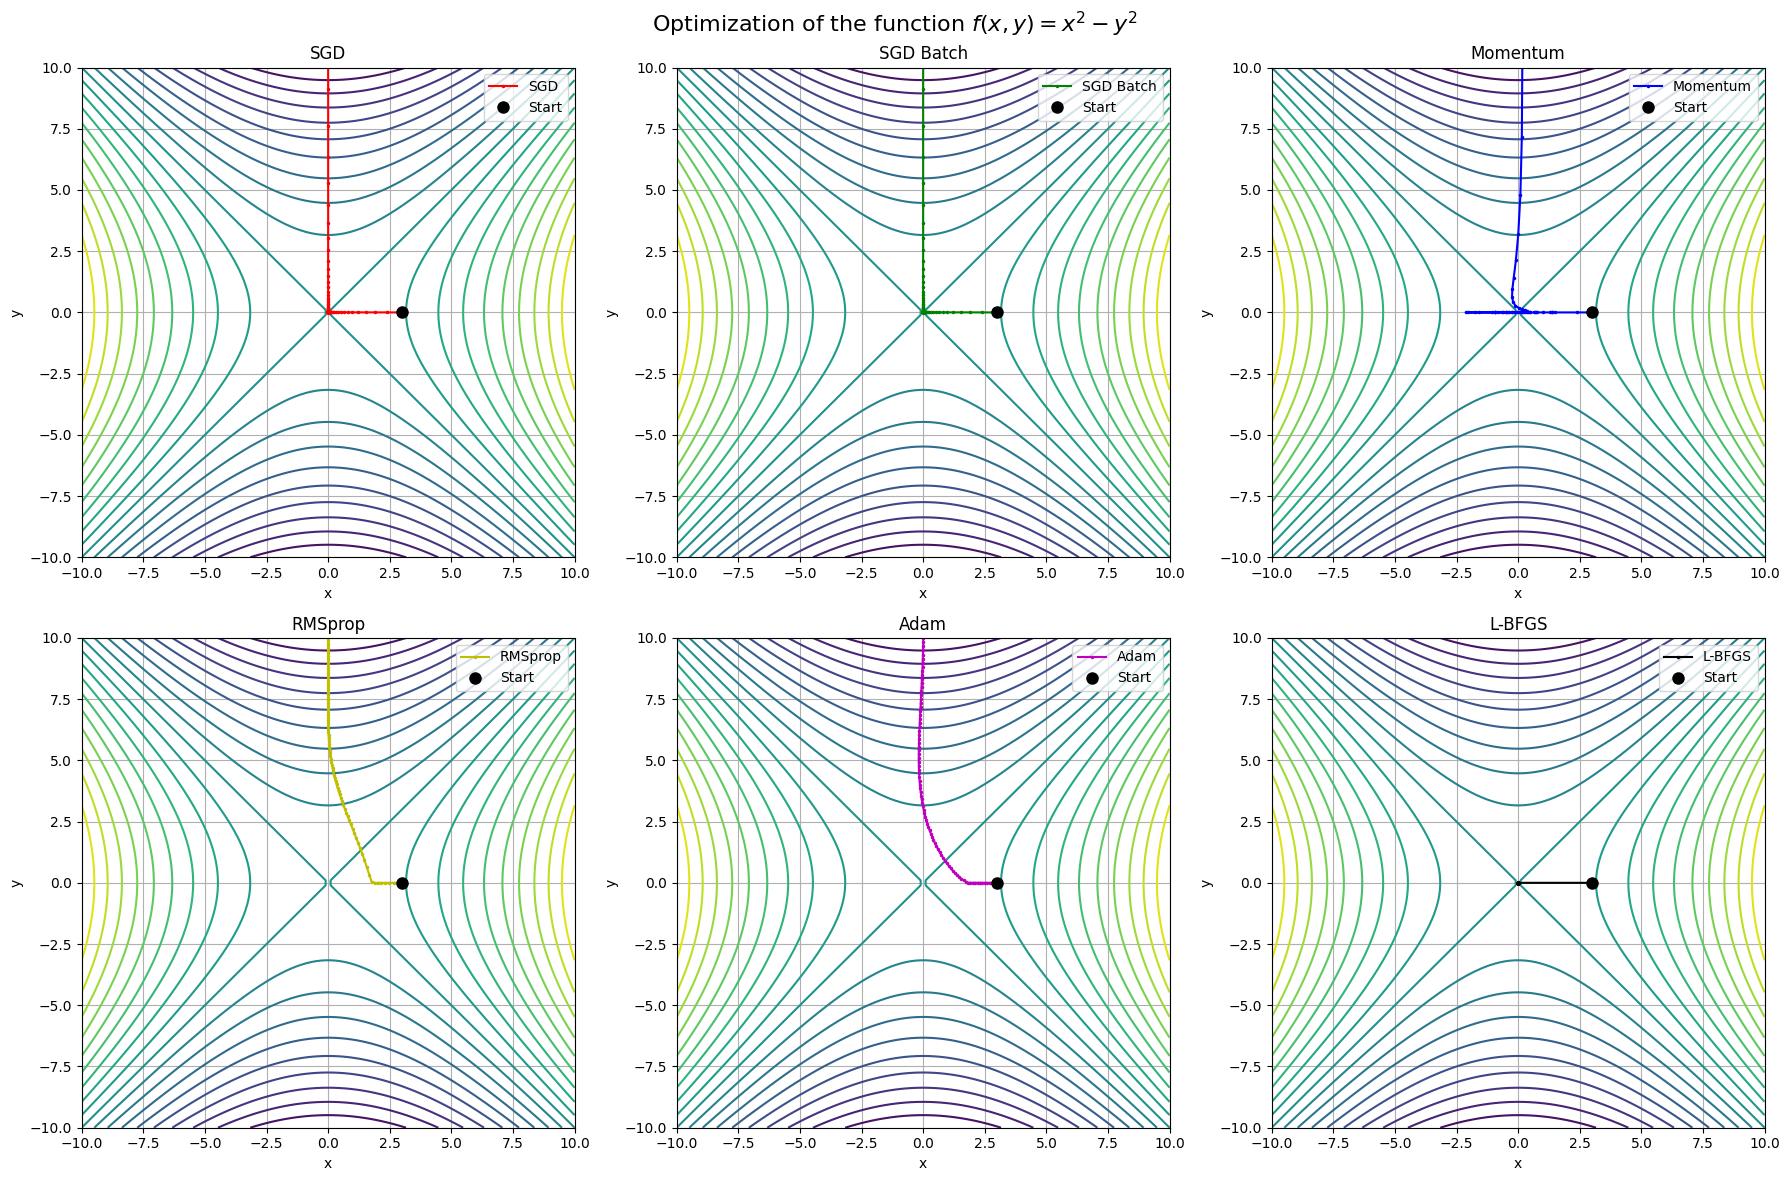

In [125]:

start_point = np.array([3.0, 0.00000001])
num_iterations = 1000

sgd_path = SGD(start_point, lr=0.1, maxiter=num_iterations)
sgd_batch_path = SGD_batch(start_point, lr=0.1, num_iters=num_iterations, batch_size=1)
momentum_path = gradient_descent_with_momentum(start_point, lr=0.1, beta=0.9, num_iters=num_iterations)
rmsprop_path = rmsprop(start_point, lr=0.1, beta=0.9, epsilon=1e-7, num_iters=num_iterations)
adam_path = adam(start_point, lr=0.1, beta1=0.9, beta2=0.999, epsilon=1e-7, num_iters=num_iterations)
lbfgs_path = lbfgs(start_point, num_iters=num_iterations, m=10)

fig, axs = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle("Optimization of the function $f(x, y) = x^2 - y^2$", fontsize=16)
axs = axs.flatten()

x_plot = np.linspace(-10, 10, 100)
y_plot = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x_plot, y_plot)
Z = f(np.column_stack((X.ravel(), Y.ravel()))).reshape(X.shape)

paths = [sgd_path, sgd_batch_path, momentum_path, rmsprop_path, adam_path, lbfgs_path]
labels = ['SGD', 'SGD Batch', 'Momentum', 'RMSprop', 'Adam', "L-BFGS"]
colors = ['r', 'g', 'b', 'y', 'm', 'k']

for i, (path, label, color) in enumerate(zip(paths, labels, colors)):
    axs[i].contour(X, Y, Z, levels=20)
    axs[i].plot(path[:, 0], path[:, 1], f'{color}.-', linewidth=1.5, markersize=3, label=label)
    axs[i].plot(start_point[0], start_point[1], 'ko', markersize=8, label='Start')
    axs[i].set_xlim([-10, 10])
    axs[i].set_ylim([-10, 10])
    axs[i].set_title(label)
    axs[i].set_xlabel('x')
    axs[i].set_ylabel('y')
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()

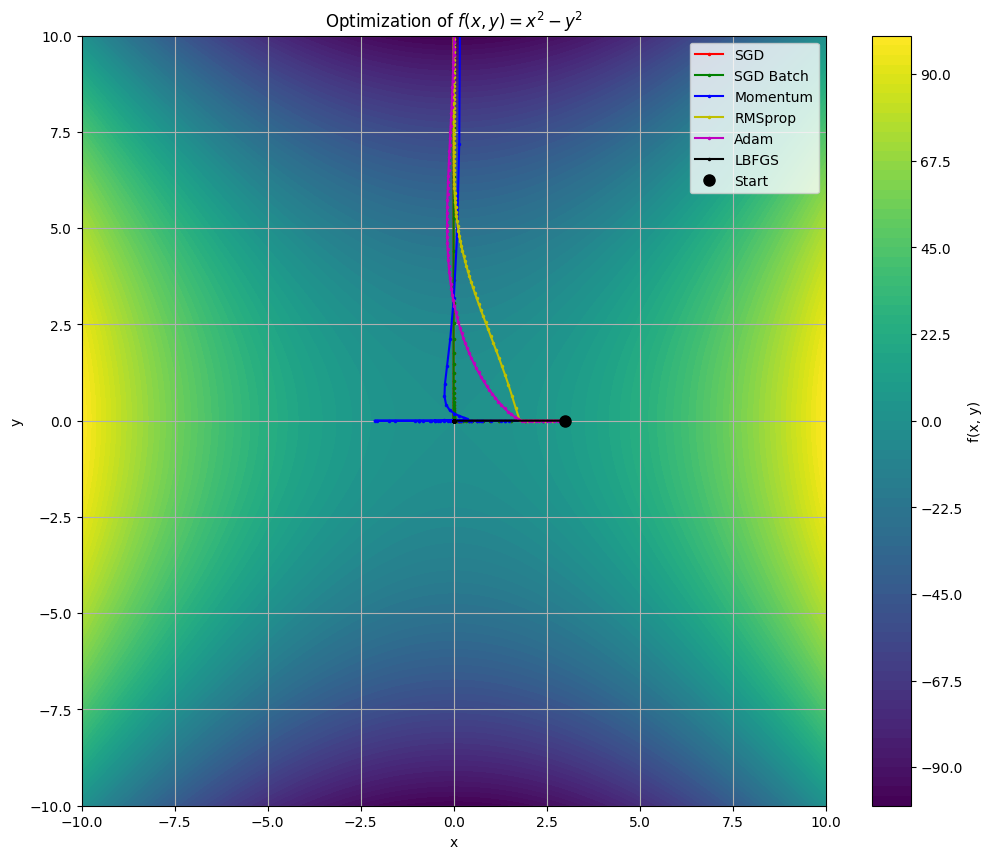

In [123]:
x_plot = np.linspace(-10, 10, 100)
y_plot = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x_plot, y_plot)
def f(X):
    X = np.array(X)
    return X[0]**2 - X[1]**2
Z = f([X.reshape(10000), Y.reshape(10000)])
plt.figure(figsize=(12, 10))
plt.contourf(X, Y, Z.reshape(X.shape),levels=80)
plt.colorbar(label='f(x, y)')
plt.title("Optimization of $f(x, y) = x^2 - y^2$")
plt.xlabel('x')
plt.ylabel('y')
plt.plot(sgd_path[:, 0], sgd_path[:, 1], 'r.-', linewidth=1.5, markersize=3, label='SGD')
plt.plot(sgd_batch_path[:, 0], sgd_batch_path[:, 1], 'g.-', linewidth=1.5, markersize=3, label='SGD Batch')
plt.plot(momentum_path[:, 0], momentum_path[:, 1], 'b.-', linewidth=1.5, markersize=3, label='Momentum')
plt.plot(rmsprop_path[:, 0], rmsprop_path[:, 1], 'y.-', linewidth=1.5, markersize=3, label='RMSprop')
plt.plot(adam_path[:, 0], adam_path[:, 1], 'm.-', linewidth=1.5, markersize=3, label='Adam')
plt.plot(lbfgs_path[:, 0], lbfgs_path[:, 1], 'k.-', linewidth=1.5, markersize=3, label='LBFGS')
plt.plot(start_point[0], start_point[1], 'ko', markersize=8, label='Start')
plt.xlim([-10,10])
plt.ylim([-10,10])
plt.legend()
plt.grid(True)
plt.show()

# A new way of optimize: L-BFGS

In [117]:
%%capture
%pip install dash

In [118]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

In [124]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import dash
from dash import dcc, html
from dash.dependencies import Input, Output

def f(X):
    if X.ndim == 1:
        return X[0]**2 - X[1]**2
    else:
        return X[:, 0]**2 - X[:, 1]**2
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f(np.column_stack((X.ravel(), Y.ravel()))).reshape(X.shape)
start_point = np.array([3.0, 0.00000001])
num_iterations = 1000

sgd_path = SGD(start_point, lr=0.1, maxiter=num_iterations)
sgd_batch_path = SGD_batch(start_point, lr=0.1, num_iters=num_iterations, batch_size=1)
momentum_path = gradient_descent_with_momentum(start_point, lr=0.1, beta=0.9, num_iters=num_iterations)
rmsprop_path = rmsprop(start_point, lr=0.1, beta=0.9, epsilon=1e-7, num_iters=num_iterations)
adam_path = adam(start_point, lr=0.1, beta1=0.9, beta2=0.999, epsilon=1e-7, num_iters=num_iterations)
lbfgs_path = lbfgs(start_point, num_iters=num_iterations, m=10)

paths = {
    'SGD': sgd_path,
    'SGD Batch': sgd_batch_path,
    'Momentum': momentum_path,
    'RMSprop': rmsprop_path,
    'Adam': adam_path,
    'L-BFGS': lbfgs_path
}

app = dash.Dash(__name__)
app.layout = html.Div([
    html.H1("Optimization of $f(x, y) = x^2 - y^2$"),
    dcc.Dropdown(
        id='method-selector',
        options=[{'label': k, 'value': k} for k in paths.keys()],
        value='SGD',
        style={'width': '200px'}
    ),
    dcc.Graph(id='plots', style={'height': '80vh'})
])
@app.callback(
    Output('plots', 'figure'),
    Input('method-selector', 'value')
)
def update_plots(selected_method):
    fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'contour'}, {'type': 'surface'}]])

    path = paths[selected_method]
    contour = go.Contour(
        x=x, y=y, z=Z,
        colorbar=dict(title='f(x,y)', x=-0.15),
        colorscale='viridis',
        zmin=-30, zmax=10
    )
    fig.add_trace(contour, row=1, col=1)
    fig.add_trace(go.Scatter(
        x=path[:, 0], y=path[:, 1],
        mode='lines+markers',
        name=selected_method,
        line=dict(color='red', width=2),
        marker=dict(size=4)
    ), row=1, col=1)
    surface = go.Surface(
        x=X, y=Y, z=Z,
        colorbar=dict(title='f(x,y)', x=1.1),
        colorscale='viridis',
        cmin=-30, cmax=10
    )
    fig.add_trace(surface, row=1, col=2)
    fig.add_trace(go.Scatter3d(
        x=path[:, 0], y=path[:, 1], z=f(path),
        mode='lines+markers',
        name=selected_method,
        line=dict(color='red', width=4),
        marker=dict(size=2)
    ), row=1, col=2)
    fig.update_layout(
        title=f'Optimization Path: {selected_method}',
        scene=dict(
            xaxis=dict(range=[-10, 10], title='x'),
            yaxis=dict(range=[-10,10], title='y'),
            zaxis=dict(range=[-30, 30], title='z'),
            aspectmode='cube',
            aspectratio=dict(x=1, y=1, z=1)
        ),
        xaxis=dict(range=[-10, 10], title='x'),
        yaxis=dict(range=[-5, 5], title='y')
    )
    fig.update_xaxes(scaleanchor="y", scaleratio=1, row=1, col=1)


    return fig
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>